# Unzip the data

In [1]:
!unzip '/content/dataset.zip'

Archive:  /content/dataset.zip
   creating: dataset/
   creating: dataset/Testing/
   creating: dataset/Testing/0/
  inflating: dataset/Testing/0/0.jpg  
  inflating: dataset/Testing/0/1.jpg  
  inflating: dataset/Testing/0/2.jpg  
  inflating: dataset/Testing/0/3.jpg  
  inflating: dataset/Testing/0/4.jpg  
   creating: dataset/Testing/1/
  inflating: dataset/Testing/1/0.jpg  
  inflating: dataset/Testing/1/1.jpg  
  inflating: dataset/Testing/1/2.jpg  
  inflating: dataset/Testing/1/3.jpg  
  inflating: dataset/Testing/1/4.jpg  
   creating: dataset/Testing/2/
  inflating: dataset/Testing/2/0.jpg  
  inflating: dataset/Testing/2/1.jpg  
  inflating: dataset/Testing/2/2.jpg  
  inflating: dataset/Testing/2/3.jpg  
  inflating: dataset/Testing/2/4.jpg  
   creating: dataset/Testing/3/
  inflating: dataset/Testing/3/0.jpg  
  inflating: dataset/Testing/3/1.jpg  
  inflating: dataset/Testing/3/2.jpg  
  inflating: dataset/Testing/3/3.jpg  
  inflating: dataset/Testing/3/4.jpg  
   creati

#Data Augmentation

In [2]:
# Import required lib

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# Creating augmentation on training variable

train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [4]:
# Creating augmentation on testing variable

test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
# Passing training data to train variable

xtrain = train_datagen.flow_from_directory('/content/dataset/Training',
                                           target_size=(64,64),
                                           class_mode='categorical',
                                           batch_size=100)

Found 594 images belonging to 6 classes.


In [6]:
# Passing testing data to test variable

xtest = test_datagen.flow_from_directory('/content/dataset/Testing',
                                         target_size=(64,64),
                                         class_mode='categorical',
                                         batch_size=100)

Found 30 images belonging to 6 classes.


# CNN Model

In [7]:
# Importing required lib

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [20]:
# Creating CNN block

model = Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3))) # Convolution layer
model.add(MaxPooling2D(pool_size=(2,2))) # Max pooling layer
model.add(Flatten()) # Flatten layer
# Fully connected layers (ANN)
model.add(Dense(1200,activation='relu')) # Hidden layer 1
model.add(Dense(600,activation='relu')) # Hidden layer 2
model.add(Dense(6,activation='softmax')) # Output layer

In [21]:
# Compile the model

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [22]:
# Train model

model.fit_generator(xtrain,
                    steps_per_epoch=len(xtrain),
                    epochs=50,
                    validation_data=xtest,
                    validation_steps=len(xtest))

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


6/6 [==============================] - 2s 193ms/step - loss: 9.1645 - accuracy: 0.1700 - val_loss: 5.7967 - val_accuracy: 0.1667
Epoch 2/50
6/6 [==============================] - 1s 159ms/step - loss: 3.4045 - accuracy: 0.1667 - val_loss: 2.0294 - val_accuracy: 0.2667
Epoch 3/50
6/6 [==============================] - 1s 157ms/step - loss: 1.9522 - accuracy: 0.3350 - val_loss: 1.7070 - val_accuracy: 0.4000
Epoch 4/50
6/6 [==============================] - 1s 156ms/step - loss: 1.7023 - accuracy: 0.2862 - val_loss: 1.6355 - val_accuracy: 0.3000
Epoch 5/50
6/6 [==============================] - 1s 161ms/step - loss: 1.6259 - accuracy: 0.4327 - val_loss: 1.4792 - val_accuracy: 0.5333
Epoch 6/50
6/6 [==============================] - 1s 170ms/step - loss: 1.4876 - accuracy: 0.5438 - val_loss: 1.3688 - val_accuracy: 0.3667
Epoch 7/50
6/6 [==============================] - 1s 165ms/step - loss: 1.2407 - accuracy: 0.6667 - val_loss: 1.0391 - val_accuracy: 0.5333
Epoch 8/50
6/6 [===============

In [23]:
# Saving model

model.save('gestures.h5')

# Testing the model

In [24]:
# Importing req lib

import numpy as np
from tensorflow.keras.preprocessing import image

In [30]:
# Reading the image

img = image.load_img('/content/dataset/Testing/0/0.jpg',target_size=(64,64))

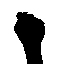

In [31]:
# Visualize the image

img

In [32]:
# Converting image to array

x = image.img_to_array(img)
x

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [33]:
# Expanding dimensions

x = np.expand_dims(x,axis=0)
x

array([[[[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        ...,

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
       

In [34]:
# Predicting animal

model.predict(x)

1/1 [==============================] - 0s 15ms/step


array([[1., 0., 0., 0., 0., 0.]], dtype=float32)

In [35]:
# For visualizing class index

xtrain.class_indices

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5}

In [36]:
# Predicting and index matching

op = ['Zero','One','Two','Three','Four','Five']
pred = np.argmax(model.predict(x))
op[pred]

1/1 [==============================] - 0s 17ms/step


'Zero'

In [38]:
# Testing

img = image.load_img('/content/dataset/Testing/3/1.jpg',target_size=(64,64))
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x))
op[pred]

1/1 [==============================] - 0s 16ms/step


'Three'

# Model Tuning

In [39]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [41]:
early_stopping = EarlyStopping(monitor='val_accuracy',
                        patience=5)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',
                        patience=5,
                        factor=0.5,min_lr=0.00001)

callback = [reduce_lr,early_stopping]

In [43]:
# Train model

model.fit_generator(xtrain,
                    steps_per_epoch=len(xtrain),
                    epochs=100,
                    callbacks=callback,
                    validation_data=xtest,
                    validation_steps=len(xtest))

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


6/6 [==============================] - 1s 168ms/step - loss: 0.0302 - accuracy: 0.9916 - val_loss: 0.4273 - val_accuracy: 0.8333 - lr: 5.0000e-04
Epoch 2/100
6/6 [==============================] - 1s 163ms/step - loss: 0.0160 - accuracy: 0.9966 - val_loss: 0.2592 - val_accuracy: 0.9000 - lr: 5.0000e-04
Epoch 3/100
6/6 [==============================] - 1s 166ms/step - loss: 0.0195 - accuracy: 0.9916 - val_loss: 0.4913 - val_accuracy: 0.8667 - lr: 5.0000e-04
Epoch 4/100
6/6 [==============================] - 1s 156ms/step - loss: 0.0243 - accuracy: 0.9933 - val_loss: 0.2516 - val_accuracy: 0.9000 - lr: 5.0000e-04
Epoch 5/100
6/6 [==============================] - 1s 159ms/step - loss: 0.0199 - accuracy: 0.9966 - val_loss: 0.4553 - val_accuracy: 0.9000 - lr: 5.0000e-04
Epoch 6/100
6/6 [==============================] - 1s 160ms/step - loss: 0.0225 - accuracy: 0.9949 - val_loss: 0.2962 - val_accuracy: 0.9000 - lr: 5.0000e-04
Epoch 7/100
6/6 [==============================] - 1s 159ms/step

In [45]:
# Testing

img = image.load_img('/content/dataset/Testing/3/2.jpg',target_size=(64,64))
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x))
op[pred]

1/1 [==============================] - 0s 17ms/step


'Three'